# Notebook to download tweets containing specific keywords

Note that this must be run locally using the dev version of snscrape as found in environment.yml (running via a local runtime on google colab will not work)

To run jupyter notebook using a particular environment do in the terminal: 

<code>conda install -c anaconda ipykernel<code>
<code>python -m ipykernel install --user --name=env name<code>
    
Then select the environment from the kernel dropdown menu

In [3]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from tqdm import tqdm

In [23]:
# Creating list to append tweet data to
keyword = 'COVID Vaccine'
keywords_list = ['ukraine']
since = '2021-01-01'
until = '2021-05-31'
num_tweets = 10000


In [5]:
# Using TwitterSearchScraper to scrape data and append tweets to list
tweets_list = []
for i,tweet in enumerate(tqdm(sntwitter.TwitterSearchScraper(keyword + ' since:' + since + ' until:' + until).get_items())):
    if i > num_tweets:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.lang])
    
# Creating a dataframe from the tweets list above
tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Like Count', 'Display Name', 'Language'])


101it [00:04, 20.89it/s]


In [6]:
def download_tweets_by_keyword(keyword):
    tweets_list = []
    # Using TwitterSearchScraper to scrape data and append tweets to list
    for i,tweet in enumerate(tqdm(sntwitter.TwitterSearchScraper(keyword + ' since:' + since + ' until:' + until).get_items())):
        if i > num_tweets:
            break
        tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.lang])
    
    # Creating a dataframe from the tweets list above
    tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Like Count', 'Display Name', 'Language'])
    return tweets_df

In [24]:
tweets_df_list = []
for keyword in keywords_list:
    print(keywords_list, keyword)
    tweets_df = download_tweets_by_keyword(keyword)
    tweets_df_list.append(tweets_df)
    print(tweets_df.head(20))

0it [00:00, ?it/s]

['ukraine'] ukraine


10001it [06:38, 25.09it/s]

                    Datetime             Tweet Id  \
0  2021-05-30 23:59:05+00:00  1399153420582326274   
1  2021-05-30 23:58:30+00:00  1399153276088635403   
2  2021-05-30 23:56:42+00:00  1399152823678517256   
3  2021-05-30 23:55:53+00:00  1399152615536136192   
4  2021-05-30 23:54:50+00:00  1399152351915778051   
5  2021-05-30 23:54:19+00:00  1399152220550189061   
6  2021-05-30 23:54:08+00:00  1399152176736489472   
7  2021-05-30 23:52:57+00:00  1399151878982672388   
8  2021-05-30 23:52:02+00:00  1399151648518311937   
9  2021-05-30 23:51:00+00:00  1399151387301363718   
10 2021-05-30 23:48:32+00:00  1399150768406503426   
11 2021-05-30 23:48:12+00:00  1399150681349660678   
12 2021-05-30 23:47:11+00:00  1399150427258687488   
13 2021-05-30 23:46:28+00:00  1399150245532123150   
14 2021-05-30 23:45:39+00:00  1399150042041225218   
15 2021-05-30 23:45:38+00:00  1399150035212902400   
16 2021-05-30 23:44:19+00:00  1399149705410588674   
17 2021-05-30 23:42:52+00:00  1399149341898588

In [25]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
tweets_df_list[0].head(20)

/var/folders/hx/0dxb0wn51wx5pscstjkwf2gc000qqf/T/ipykernel_48758/2310616003.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language
0,2021-05-30 23:59:05+00:00,1399153420582326274,@JennaEllisEsq Stealing an election sounds like an impeachable offense 🤔\nMuch more so than a perfect call to the Ukraine and giving a solid speech in D. C.,Gerardo86769852,0,Gerardo Garcia,en
1,2021-05-30 23:58:30+00:00,1399153276088635403,@occono So not in the 'Ukraine shoulda won' crowd I take it?,VK_HM,0,Valondar,en
2,2021-05-30 23:56:42+00:00,1399152823678517256,Natalie. girl. Run! Run back to Ukraine. Michael’s not worth it. #90DayFiance,ana_amarques019,1,Ana,en
3,2021-05-30 23:55:53+00:00,1399152615536136192,"@stevejetcity Biden is the real Putin puppet, along with China, Iran, Ukraine and many others plus he's a pedophile and his son is a crackhead.",EddieFo33300658,0,The Iceman,en
4,2021-05-30 23:54:50+00:00,1399152351915778051,@_saucybint Ukraine,mustafaxhussein,0,M,en
5,2021-05-30 23:54:19+00:00,1399152220550189061,@Biz_Ukraine_Mag .@DarthPutinKGB lookin' pretty! ^,HereNowForever1,0,Andrea Wallenberger,en
6,2021-05-30 23:54:08+00:00,1399152176736489472,@designer_ayanna 1st online store in @Ukraine🇺🇦 \nstarted accepting payments with #SAFEMOON🚀\n\n🌍 Worldwide delivery\n🔥 DISCOUNT for #SafeMoonCommunity\n\n#SAFEMOONARMY retweet!\n\nhttps://t.co/ZljcqkW1Eh,SafemoonUkraine,1,YuriyS🇺🇦,en
7,2021-05-30 23:52:57+00:00,1399151878982672388,Daily Prayers in Songs For Difficult Times\n\nOm Sri Ram Jai Ram- 8 min -\nhttps://t.co/TPMIVkvloA\n\nHari naam nahi to -\nhttps://t.co/PMVELJAcGu\n\ndukho se jo thokar khai na hoti-\nhttps://t.co/fV23sQz056\n\nUkraine Festival 2015 Kirtan by Madhava-\nhttps://lnkd.i…https://t.co/VWPNnGMoWI,pravinagrawal8,0,pravin agrawal,hi
8,2021-05-30 23:52:02+00:00,1399151648518311937,"@BurningUpTheSu1 @ForAshli I don't know who is ""behind"" the politicization of the DOJ. I think the DNC has a very strong hand in what they do.Look at the violence when Trump was inaugurated/charges versus the ""insurrection"". Trump/Russia versus Biden/China/Ukraine/Russia 1 is investigated for years other 0",Shpanky24,0,"ALL PARTIES ARE CORRUPT, ELECTIONS DONT MATTER❌",en
9,2021-05-30 23:51:00+00:00,1399151387301363718,@Biz_Ukraine_Mag @StillDelvingH The Tory govt's lord and masters,KinondoniDsm,0,KinondoniDSM 🇪🇺,en


In [21]:
from PIL import Image
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
import matplotlib.pyplot as plt

In [26]:
tweets_df = tweets_df_list[0]

In [27]:
text = " ".join(text for text in tweets_df.Text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 1759854 words in the combination of all review.


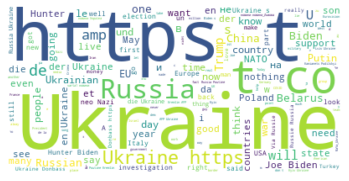

In [28]:
# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
tweets